In [20]:
#Importing Pandas Library
import pandas as pd

In [21]:
#Importing Dataset

#Open the text file
with open('spam_sms.txt', 'r') as f:
    text = f.read()

#Split the text into rows
rows = text.split('\n')

#Split each row into columns using the tab separator
data = [row.split('\t') for row in rows]

#Create a DataFrame (pandas) with the columns 'Type' and 'Message'
df = pd.DataFrame(data, columns=['Type', 'Message'])


In [3]:
#To see the first 5 rows
df.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
#Get the shape of the dataframe before cleaning
print("Data shape:", df.shape)

Data shape: (5575, 2)


In [5]:
#DATA CLEANING

#Drop the last row, which contains an empty string
df = df[:-1]

#Convert the 'Type' column to a binary (numerical) format (0 for ham, 1 for spam)
df.loc[:, 'Type'] = df['Type'].map({'ham': 0, 'spam': 1})

#Remove any leading or trailing whitespaces from the 'Message' column
df.loc[:, 'Message'] = df['Message'].str.strip()

# Print the first few rows of the cleaned DataFrame
df.head()

<ipython-input-5-a51f8febc3a0>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Type'] = df['Type'].map({'ham': 0, 'spam': 1})


,Type,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Get the shape of the dataframe after cleaning
print("Data shape:", df.shape)

#Count the number of occurrences of each label
print(df['Type'].value_counts())


Data shape: (5574, 2)
0    4827
1     747
Name: Type, dtype: int64


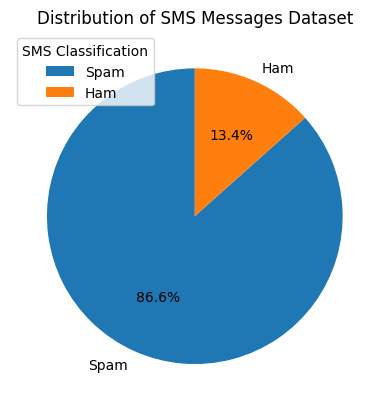

In [7]:
#ANALYSIS OF OUR DATA

import matplotlib.pyplot as plt

#Create a pie chart
labels = ['Spam', 'Ham']
sizes = df['Type'].value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

#Add a title and legend
plt.title('Distribution of SMS Messages Dataset')
plt.legend(title='SMS Classification', loc='upper left')

#Display the plot
plt.show()


In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')

#Instantiate stemmer
ps = PorterStemmer()

#Cleaning the messages and building a corpus
corpus = []
for message in df['Message']:
    #Remove punctuation and special characters
    message = re.sub('[^a-zA-Z]', ' ', message)
    #Convert message to lowercase
    message = message.lower()
    #Tokenize message into individual words
    words = message.split()
    #Remove stop words and stem the remaining words
    words = [ps.stem(word) for word in words if not word in set(stopwords.words('english'))]
    #Join the stemmed words back into a string
    message = ' '.join(words)
    corpus.append(message)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#Create bag of words model
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [10]:
#To create a new DataFrame with a binary encoding of the 'label' column
y = pd.get_dummies(df['Type'])
#To select the second column, which corresponds to the 'spam' label
y = y.iloc[:, 1].values

In [11]:
from sklearn.model_selection import train_test_split
#We split our data as %20 test data and %80 train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

#Train and test all classifiers defined

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)


svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)


lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)


dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [13]:
from tabulate import tabulate

#Create a list of lists to hold the data
table = [
    ['Naive Bayes', nb_accuracy],
    ['Logistic Regression', lr_accuracy],
    ['Decision Tree', dt_accuracy],
    ['Random Forest', rf_accuracy],
    ['Support Vector Machine', svm_accuracy]
]

#Set the headers for the table
headers = ['Classifier', 'Accuracy Score']

#Print the table
print(tabulate(table, headers=headers))


Classifier                Accuracy Score
----------------------  ----------------
Naive Bayes                     0.979079
Logistic Regression             0.982666
Decision Tree                   0.962343
Random Forest                   0.977286
Support Vector Machine          0.980873


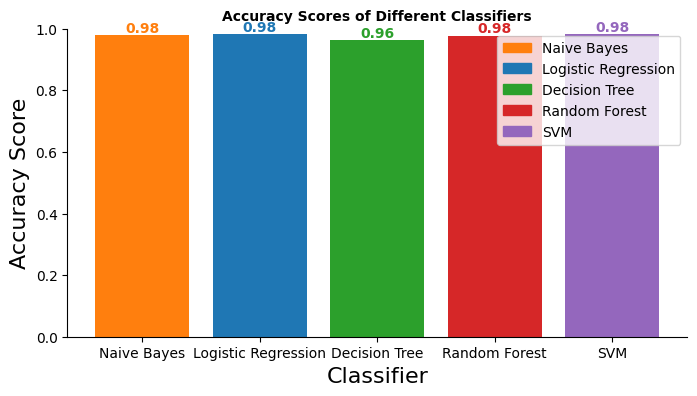

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and test classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='linear')
}

accuracy_scores = []
class_report = []
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    class_report.append(classification_report(y_test, y_pred, output_dict=True))
    
# Set colors for each classifier
colors = ['#ff7f0e', '#1f77b4', '#2ca02c', '#d62728', '#9467bd']

# Plot accuracy scores
fig, ax = plt.subplots(figsize=(8,4))
bar = ax.bar(classifiers.keys(), accuracy_scores, color=colors)

# Add labels and values to each bar
for i, v in enumerate(accuracy_scores):
    ax.text(i, v+0.01, f"{v:.2f}", color=colors[i], fontweight='bold', ha='center')

ax.set_xlabel('Classifier', fontsize=16)
ax.set_ylabel('Accuracy Score', fontsize=16)
ax.set_ylim(0, 1)
ax.set_title('Accuracy Scores of Different Classifiers', fontsize=10, fontweight='bold')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add legend for colors
handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(colors))]
labels = classifiers.keys()
plt.legend(handles, labels, loc='upper right', fontsize=10)

plt.show()




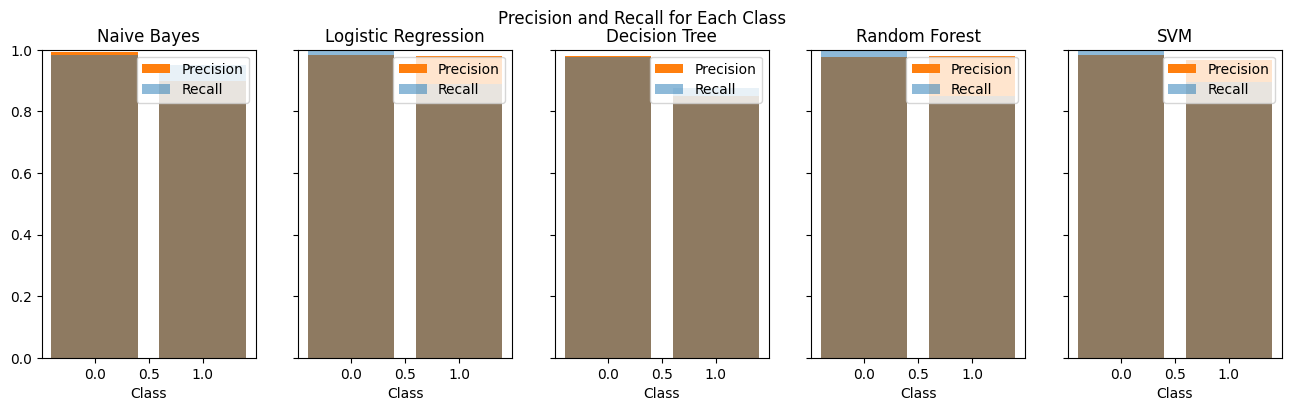

In [15]:
#Plot precision and recall
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
fig.suptitle('Precision and Recall for Each Class')

for i, (name, clf) in enumerate(classifiers.items()):
    class_names = np.unique(y_test)
    class_precision = [class_report[i][str(c)]['precision'] for c in class_names]
    class_recall = [class_report[i][str(c)]['recall'] for c in class_names]
    axs[i].bar(class_names, class_precision, label='Precision', color='#ff7f0e')
    axs[i].bar(class_names, class_recall, label='Recall', color='#1f77b4', alpha=0.5)
    axs[i].set_xlabel('Class')
    axs[i].set_title(name)
    axs[i].set_ylim(0, 1)
    axs[i].legend()
plt.show()



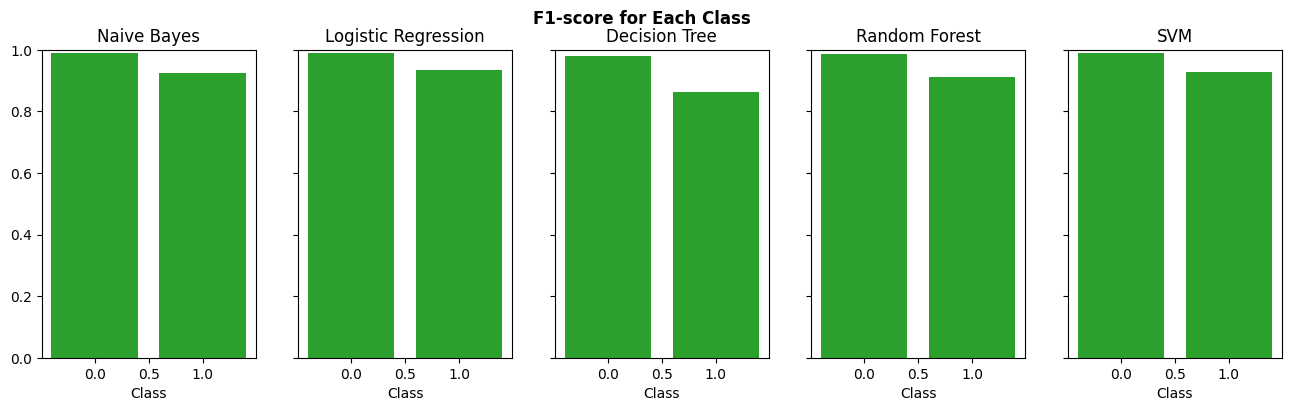

In [16]:
# Plot F1-score for each class
fig, axs = plt.subplots(1, 5, figsize=(16, 4), sharey=True)
fig.suptitle('F1-score for Each Class', fontweight='bold')

for i, (name, clf) in enumerate(classifiers.items()):
    class_names = np.unique(y_test)
    class_f1 = [class_report[i][str(c)]['f1-score'] for c in class_names]
    axs[i].bar(class_names, class_f1, color='#2ca02c')
    axs[i].set_xlabel('Class')
    axs[i].set_title(name)
    axs[i].set_ylim(0, 1)
plt.show()

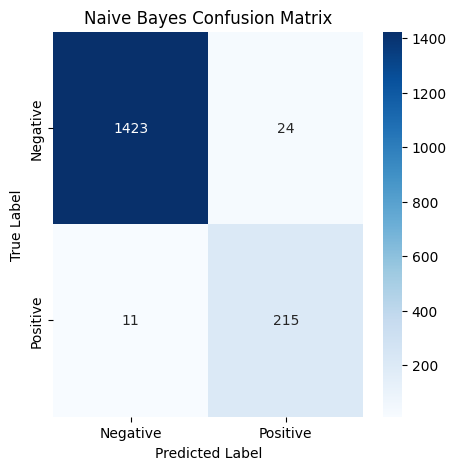

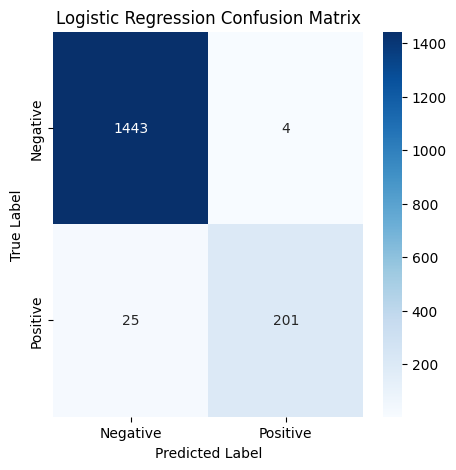

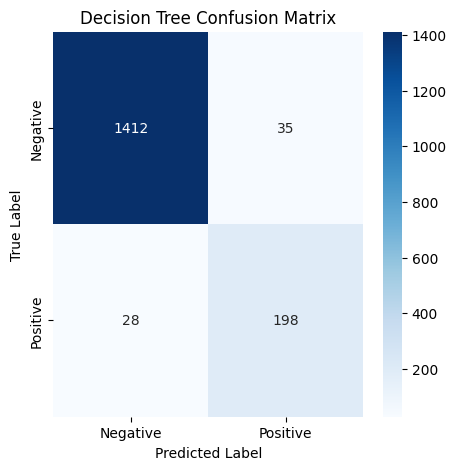

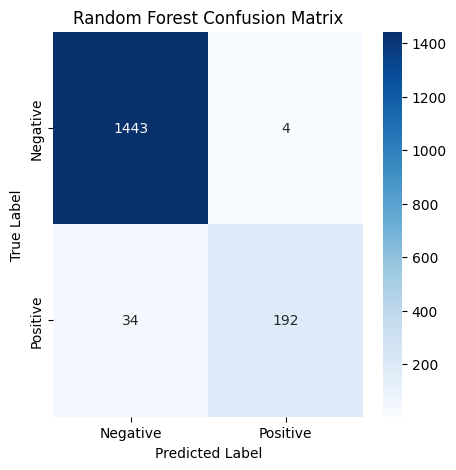

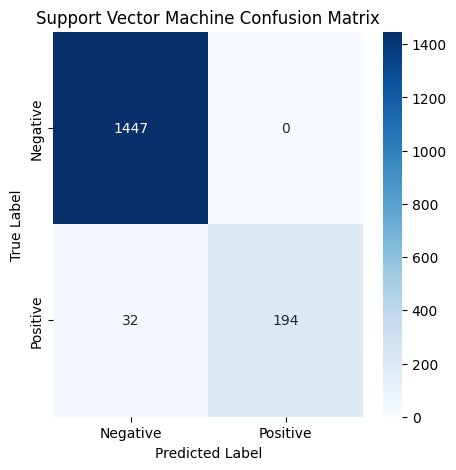

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

classifiers = {'Naive Bayes': nb,
               'Logistic Regression': lr,
               'Decision Tree': dt,
               'Random Forest': rf,
               'Support Vector Machine': svm}

# Loop through each classifier
for name, clf in classifiers.items():
    #Train the classifiers
    clf.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    #Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # lot the confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [18]:
from sklearn.metrics import accuracy_score
#TRY THE BEST ACCURACY ALGORITHM INTO AN EXAMPLE (LOGISTIC REGRESSION)

# Evaluate the classifier on the test set
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

#EXAMPLE DATAS (MESSAGES) USED 
new_messages = ["Congratulations! You've been selected to win a free vacation. Click here to claim your prize.",
                "Hello how are you my friend?"]
new_corpus = [re.sub('[^a-zA-Z]', ' ', message).lower() for message in new_messages]
new_X = cv.transform(new_corpus).toarray()
new_y_pred = lr.predict(new_X)

#Print the predictions for the new messages
for message, label in zip(new_messages, new_y_pred):
    if label == 1:
        print(message, "---> THIS IS A SPAM MESSAGE !!!")
    else:
        print(message, "---> THIS IS A HAM MESSAGE")


Test accuracy: 0.9826658696951583
Congratulations! You've been selected to win a free vacation. Click here to claim your prize. ---> THIS IS A SPAM MESSAGE !!!
Hello how are you my friend? ---> THIS IS A HAM MESSAGE
